# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [128]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from IPython.display import clear_output

import torch
from torch import nn

import pandas as pd
from sklearn.linear_model import LinearRegression

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [19]:
# собираем модули в последовательность.
model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном тоже 2.
    nn.Linear(in_features=1, out_features=2),
    # та же ф-ция активации, что и раньше, только из pytorch.
    nn.Sigmoid(),
    # кол-во признаков во входном слое 2, в выходном тоже 1.
    nn.Linear(in_features=2, out_features=1),
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [20]:
sample_size = int(1e6)
input_data = sps.norm.rvs(size=(sample_size, 1))

Разделим данные на обучающую и тестовую части в соотношении 4:1.

In [21]:
train_x , test_x = train_test_split(input_data, test_size=0.2)

$y(x)$ = $sin$($tan$($cos$($x$))) * $x$.

In [22]:
train_y = np.sin(np.tan(np.cos(train_x))) * train_x
test_y = np.sin(np.tan(np.cos(test_x))) * test_x

Давайте изменим тип данных на torch.FloatTensor.

In [23]:
test_x = torch.FloatTensor(test_x)
train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)
test_y = torch.FloatTensor(test_y)

Обучите нейросеть на этих данных. Используйте код с занятия.

Гиперпараметр скорости обучения.

In [24]:
learning_rate = 0.3

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optim_func = nn.MSELoss()

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

In [26]:
def show_progress(x, y, y_pred, loss):
    """
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    """

    # Открепим переменную от вычислительного графа перед отрисовкой графика.
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число.
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий.
    clear_output(wait=True)

    # Строим новый график.
    plt.figure(figsize=(13, 10))
    plt.scatter(x, y, alpha=0.3)
    plt.scatter(x, y_pred, color="orange", alpha=0.3)
    plt.xlabel("Ось X")
    plt.ylabel("Ось Y")
    plt.title("график аппроксимации нейросетью нелинейной функции")

    # Строим легенду.
    plt.legend(("исходная функция", "аппроксимации нейросетью"))
    plt.show()

    print(f"MSE = {loss:.2f}%")

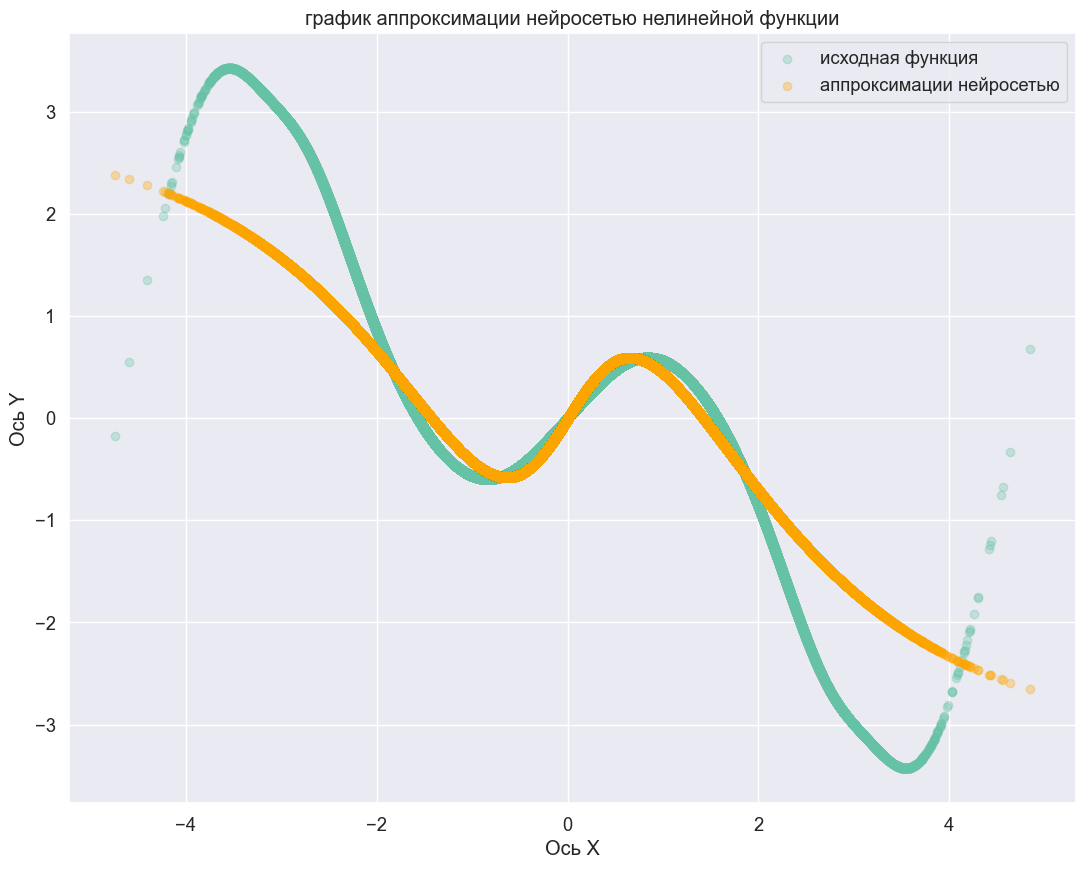

MSE = 0.04%


In [138]:
# Количество итераций.
iteration_count = 20000

for i in range(iteration_count):

    # Forward pass: предсказание модели по данным train_x.
    y_pred = model(train_x)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям.
    loss = optim_func(y_pred, train_y)

    # Bakcward pass: вычисление градиентов оптимизируемой функции.
    # по всем параметрам модели.
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего.
    # метода оптимизации, используются вычисленные ранее градиенты.
    optimizer.step()

    # Зануление градиентов.
    optimizer.zero_grad()

    # График + вывод MSE через каждые 100 итераций.
    if (i + 1) % 100 == 0:
        print("iteration:", i + 1, "loss:", loss.item())

        # чем ближе мы подходим к минимуму, тем меньший шаг мы должны сделать в SGD.
        if loss.item() < 0.1:
            learning_rate = 0.1
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        if loss.item() < 0.04:
            print("Готово!")
            break

show_progress(train_x, train_y, y_pred, loss)

MSE на тестовой части данных.

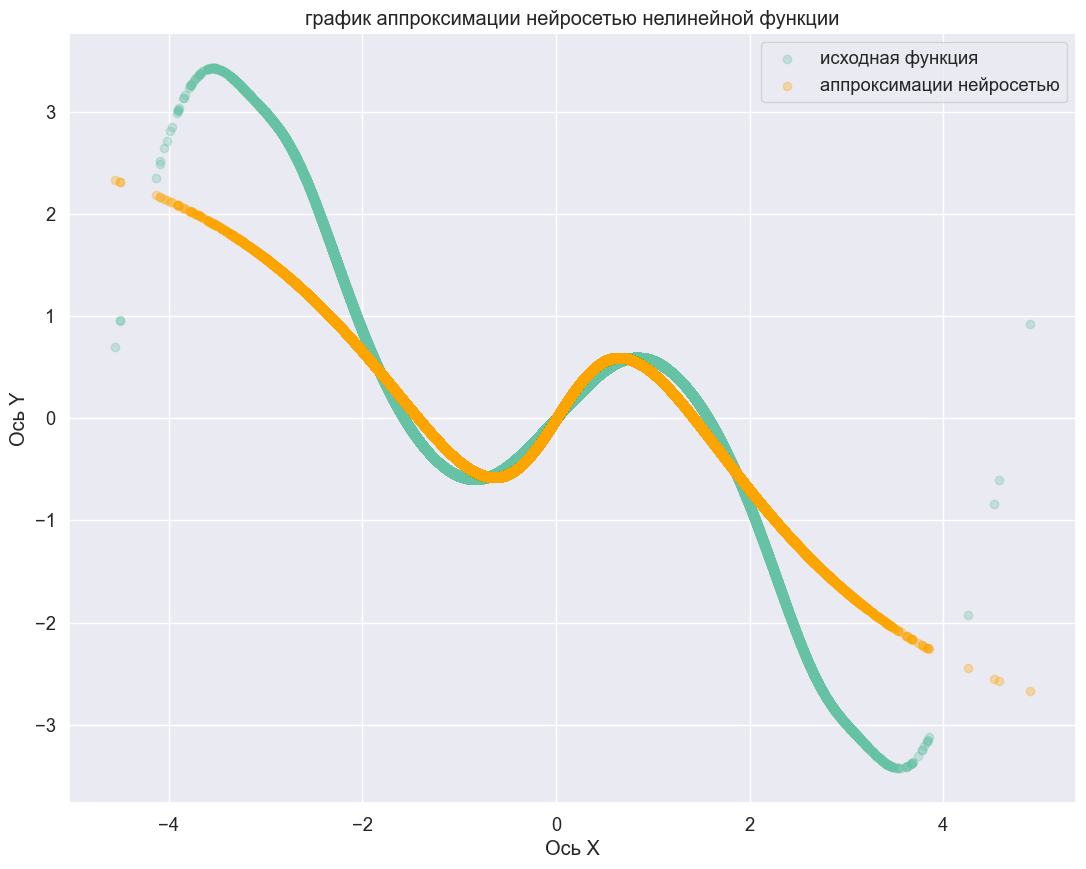

MSE = 0.04%


In [139]:
pred_y_test = model(test_x)
show_progress(test_x, test_y, pred_y_test, loss)

**Вывод:**

Мы обучили модель на случайной нормально распределенной выборке данных при помощи библиотеки PyTorch, используя для подбора параметров метод SGD. То есть, для обучения модели мы применили метод обратного распространения ошибки для вычисления градиента.

В частности, мы хотели практическим путем получить аппроксимацию непрерывной функции $y(x) = sin(tan(cos(x))) \cdot x$.
* Выбор пал на эту функцию, так как она является достаточно сложной для гладкой функции.

По графику можно сделать вывод о том, что нейросеть достаточно хорошо справилась со своей задачей, так как как на обучающих данных, так и на тестовых модель показала хорошие результаты. Среднеквадратичная ошибка (MSE) равна 0.04% в обоих случаях.
* Также можно заметить, что на концах графика модель ведет себя сильно по-другому, чем исходная функция. Это связано с тем, что исходная выборка имела нормальное распределение, а не равномерное распределение. Из-за этого модель сосредоточилась на приближении графика именно в центре, а не по всей области графика.
* Эту проблему с отклонениями на концах можно было бы решить, увеличив количество выходов на первом слое и входов на втором слое, по+скольку у модели будет большая свобода для подбора параметров.

По поводу совпадения MSE на тестовом и тренировочных наборах можно сказать, что все это из-за того, что выборка одномерная и покрывает "нормально" весь отрезок. Или, другими словами, когда мы делим их на два набора, то получаем, что обе выборки одинаково распределены. Более того, из-за большого количества данных, тестовая выборка не сильно отличается от тренировочной.


---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [27]:

def sigmoid(x):
    # Сигмоидная функция активации: o(x) = 1 / (1 + e^(-x)).
    return np.exp(x) / (1 + np.exp(x))


def deriv_sigmoid(x):
    # Производная сигмоиды: o'(x) = o(x) * (1 - o(x)).
    return x * (1 - x)


def mse_loss(y_true, y_pred):
    # y_true и y_pred - массивы numpy одинаковой длины.
    return ((y_true - y_pred) ** 2).mean()


class NeuralNetwork:
    """

    Нейронная сеть с:
      - 1 входами
      - скрытым слоем с 2 нейронами
      - выходной слой с 1 нейроном
    Обозначения взяты из задания 1.

              w11          sigm(x)    w21
           |---->(sum: b11)----->[u1]-----|
    [x]-----  w12          sigm(x)    w22 |--->(sum: b2)--->[y2]
           |---->(sum: b12)----->[u2]-----|
    """

    def __init__(self):
        """
        Инициализация модели.
        """
        # Параметры модели. (w11, w12, w21, w22, b12, b22, b2).
        self.parameters = np.random.sample(7) + 0.1

        # скорость обучения.
        self.learning_rate = 0.1

        # Веса.
        self.w11 = self.parameters[0]
        self.w12 = self.parameters[1]
        self.w21 = self.parameters[2]
        self.w22 = self.parameters[3]

        # # Пороги.
        self.b11 = self.parameters[4]
        self.b12 = self.parameters[5]
        self.b2 = self.parameters[6]

    def __restoring_parameters(self):
        """
        private member function.

        Обновления значении параметров.
        """
        # Веса.
        self.w11 = self.parameters[0]
        self.w12 = self.parameters[1]
        self.w21 = self.parameters[2]
        self.w22 = self.parameters[3]

        # # Пороги.
        self.b11 = self.parameters[4]
        self.b12 = self.parameters[5]
        self.b2 = self.parameters[6]

    def predict(self, input_data):
        """
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, 1);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        """
        self.predictions = (self.w21 * sigmoid((self.w11 * input_data) + self.b11) + (self.w22 * sigmoid((self.w12 * input_data) + self.b12))) + self.b2
        return self.predictions

    def train(
        self,
        input_data: np.ndarray,
        output_data: np.ndarray,
        iteration_count=1000,
        is_logging=False,
        logging_frequency=0,
    ):
        """
        Обучение модели(GD).

        Аргументы:
        input_data - входные данные, нейронные сети
        output_data - выходные данные нейронной сети
        iteration_count - количество итерации(эпох)
        is_logging - логировать значения MSE?
        logging_frequency - частота логгирования
        """
        for iter_num in range(iteration_count):
            # --- Вычисление нектороых значении (эти значения нам понадобятся позже).
            sum1 = (self.w11 * input_data) + self.b11
            sum2 = (self.w12 * input_data) + self.b12
            u1 = sigmoid(sum1)
            u2 = sigmoid(sum2)

            # --- Вычислим предсказание модели.
            self.predictions = self.predict(input_data)

            # --- Считаем частные производные.
            # Имена: d_L_d_w1 = "частная производная L по w1"

            # пункт 2.1
            d_L_d_y_pred = (self.predictions - output_data) * (2 / output_data.size)

            # Пункт 2.2
            d_y_pred_d_w21 = u1
            d_y_pred_d_w22 = u2

            d_y_pred_d_b2 = 1

            d_y_pred_d_u1 = self.w21
            d_y_pred_d_u2 = self.w22

            d_L_d_w21 = (d_L_d_y_pred * d_y_pred_d_w21).sum()
            d_L_d_w22 = (d_L_d_y_pred * d_y_pred_d_w22).sum()

            d_L_d_b2 = (d_L_d_y_pred * d_y_pred_d_b2).sum()

            d_L_d_u1 = (d_L_d_y_pred * d_y_pred_d_u1).sum()
            d_L_d_u2 = (d_L_d_y_pred * d_y_pred_d_u2).sum()

            # Пункт 2.3
            d_u1_d_w11 = deriv_sigmoid(sum1) * input_data
            d_u2_d_w12 = deriv_sigmoid(sum2) * input_data

            d_u1_d_b11 = deriv_sigmoid(sum1)
            d_u2_d_b12 = deriv_sigmoid(sum2)

            d_L_d_w11 = d_L_d_u1 * d_u1_d_w11.sum()
            d_L_d_w12 = d_L_d_u2 * d_u2_d_w12.sum()

            d_L_d_b11 = d_L_d_u1 * d_u1_d_b11.sum()
            d_L_d_b12 = d_L_d_u2 * d_u2_d_b12.sum()

            # --- Вычисление градиента.
            self.grad = np.array(
                [
                    d_L_d_w11,
                    d_L_d_w12,
                    d_L_d_w21,
                    d_L_d_w22,
                    d_L_d_b11,
                    d_L_d_b12,
                    d_L_d_b2,
                ]
            )

            # --- Обновляем веса и пороги
            self.parameters = self.parameters - (self.learning_rate * self.grad)
            self.__restoring_parameters()

            # --- Считаем полные потери в конце каждой эпохи
            if is_logging & (iter_num % logging_frequency == 0):
                self.predict(input_data)
                self.my_loss = mse_loss(output_data, self.predictions)
                print("Epoch %d, my_loss: %.10f" % (iter_num, self.my_loss))

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Преобразуем данные в np.ndarray.

In [28]:
train_x = train_x.numpy()
train_y = train_y.numpy()
test_x = test_x.numpy()
test_y = test_y.numpy()

Обучим данные на тренировочной выборке с помощью нашей модели.

In [32]:
# test_x.reshape(1, test_x.size)
# test_y.reshape(1, test_y.size)
# train_x.reshape(1, train_x.size)
# train_y.reshape(1, train_y.size)

my_model = NeuralNetwork()
my_model.train(train_x, train_y, 1000, True, 100)

/tmp/ipykernel_984026/834686970.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_984026/834686970.py:8: RuntimeWarning: overflow encountered in multiply
  return x * (1 - x)
/home/nurik/work/py_project/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Epoch 0, my_loss: 2.3600289822
Epoch 100, my_loss: nan
Epoch 200, my_loss: nan


KeyboardInterrupt: 

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

Повторите вычисления для другой нелинейной функции $y(x)$.

**Вывод:**
...